In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [38]:
sns.set_style('darkgrid')

In [39]:
from pandas_datareader.data import DataReader 

In [40]:
from datetime import datetime

In [41]:
from __future__ import division

In [80]:
auto_list=['TSLA','NSANY','RACE','F','TM']

In [81]:
end=datetime.now()

start=datetime(end.year-1,end.month,end.day)

In [82]:
for stock in auto_list:
    globals()[stock]=DataReader(stock,'yahoo',start,end)

In [83]:
RACE.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,127.383327,125.105191,126.222669,126.291633,5.990118e+05,125.358691
std,12.557083,12.754828,12.598529,12.753214,5.770727e+05,12.770823
min,97.873001,93.849998,95.889999,95.959999,1.520000e+05,95.163597
25%,116.820000,114.480000,115.930000,116.029999,3.065000e+05,115.067036
50%,130.606995,128.304993,129.619995,129.539993,4.405000e+05,128.464905
75%,137.195000,135.445000,136.180000,136.410004,7.070500e+05,135.357239
max,149.850006,148.250000,149.850006,149.330002,6.443500e+06,148.090668


In [84]:
RACE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2018-05-29 to 2019-05-28
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null float64
Adj Close    251 non-null float64
dtypes: float64(6)
memory usage: 13.7 KB


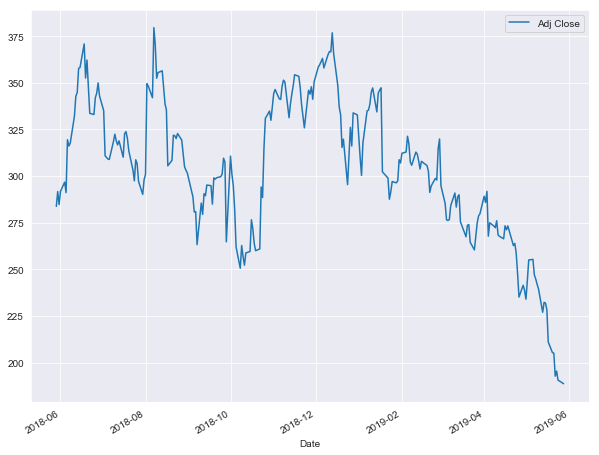

In [85]:
TSLA['Adj Close'].plot(legend=True,figsize=(10,8))

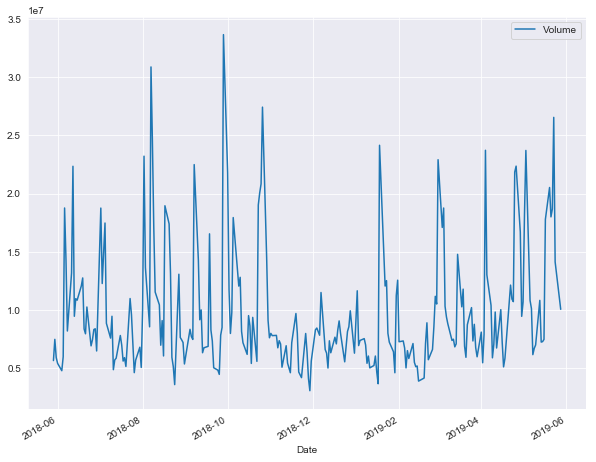

In [86]:
TSLA['Volume'].plot(legend=True,figsize=(10,8))

In [87]:
moving_avg=[20,40,100]

In [88]:
for ma in moving_avg:
    column="MA for %s days" %(str(ma)) 
    TSLA[column]=pd.Series(TSLA['Adj Close']).rolling(window=ma).mean()
        

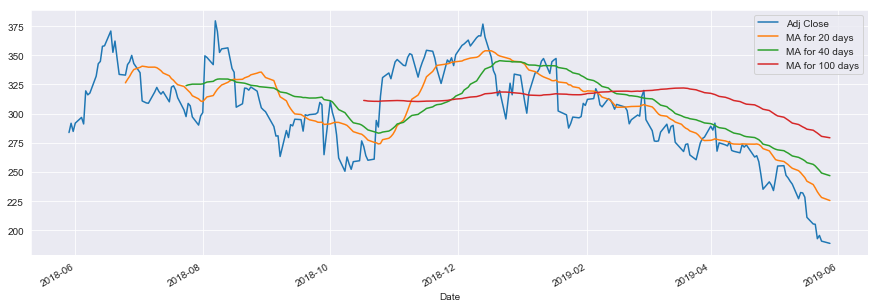

In [89]:
TSLA[['Adj Close','MA for 20 days','MA for 40 days','MA for 100 days']].plot(subplots=False,figsize=(15,5))

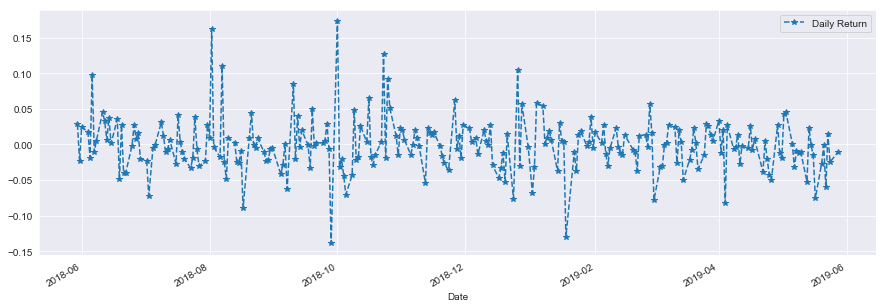

In [90]:
TSLA['Daily Return']=TSLA['Adj Close'].pct_change()

TSLA['Daily Return'].plot(figsize=(15,5),linestyle='--',marker='*',legend=True)

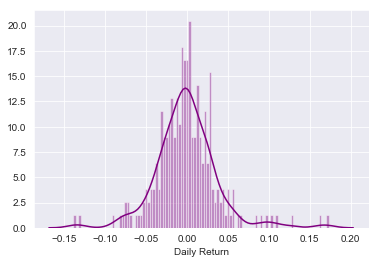

In [91]:
sns.distplot(TSLA['Daily Return'].dropna(),bins=100,color='purple')

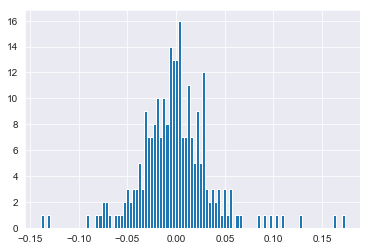

In [92]:
TSLA['Daily Return'].hist(bins=100)

In [93]:
closing_df=DataReader(auto_list,'yahoo',start,end)['Adj Close']

In [94]:
closing_df.head()

Symbols,F,NSANY,RACE,TM,TSLA
Date,,,,,
2018-05-29,10.534015,19.063665,125.965820,124.919594,283.760010
2018-05-30,10.635304,18.959698,129.169022,125.442154,291.720001
2018-05-31,10.635304,18.751764,130.259888,126.171753,284.730011
2018-06-01,10.782632,18.713959,131.797012,129.464813,291.820007
2018-06-04,10.810257,18.978601,131.152420,132.393082,296.739990


In [96]:
auto_returns=closing_df.pct_change()

In [97]:
auto_returns.head()

Symbols,F,NSANY,RACE,TM,TSLA
Date,,,,,
2018-05-29,NaN,NaN,NaN,NaN,NaN
2018-05-30,0.009615,-0.005454,0.025429,0.004183,0.028052
2018-05-31,0.000000,-0.010967,0.008445,0.005816,-0.023961
2018-06-01,0.013853,-0.002016,0.011800,0.026100,0.024901
2018-06-04,0.002562,0.014141,-0.004891,0.022618,0.016860


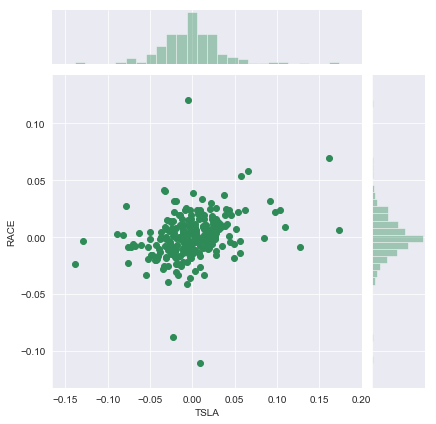

In [99]:
sns.jointplot('TSLA','RACE',auto_returns,kind='scatter',color='seagreen')

In [100]:
auto_returns.head()

Symbols,F,NSANY,RACE,TM,TSLA
Date,,,,,
2018-05-29,NaN,NaN,NaN,NaN,NaN
2018-05-30,0.009615,-0.005454,0.025429,0.004183,0.028052
2018-05-31,0.000000,-0.010967,0.008445,0.005816,-0.023961
2018-06-01,0.013853,-0.002016,0.011800,0.026100,0.024901
2018-06-04,0.002562,0.014141,-0.004891,0.022618,0.016860


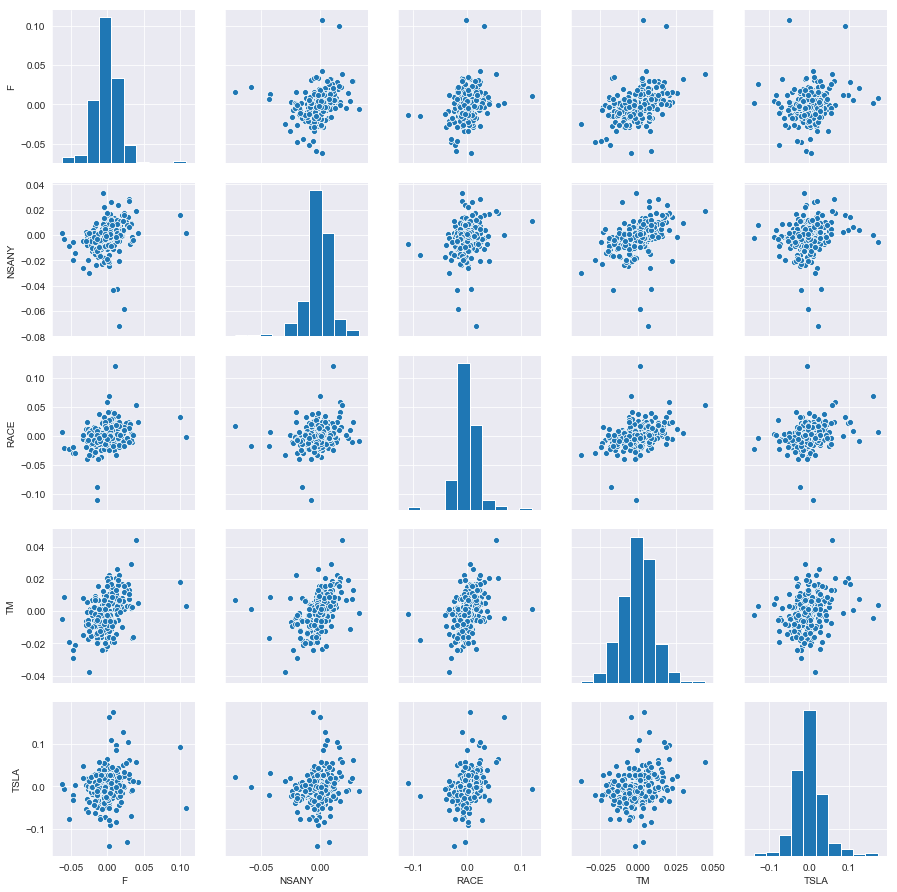

In [101]:
sns.pairplot(auto_returns.dropna())

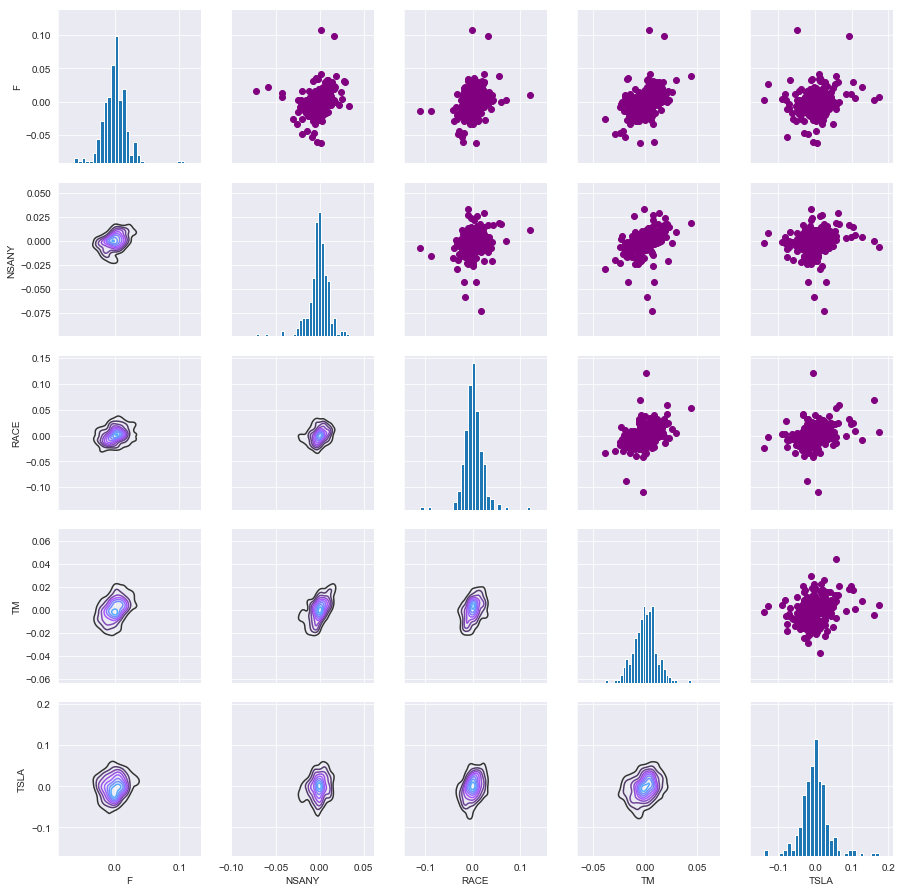

In [105]:
returns_fig=sns.PairGrid(auto_returns.dropna())


returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

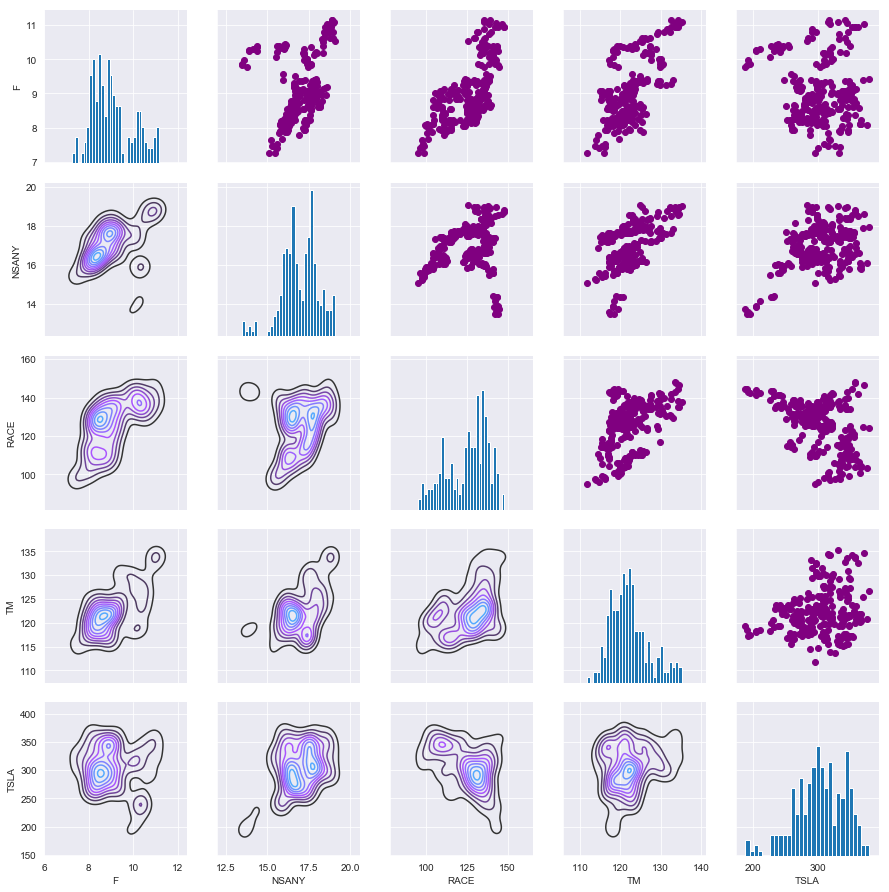

In [108]:
returns_fig=sns.PairGrid(closing_df.dropna())


returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

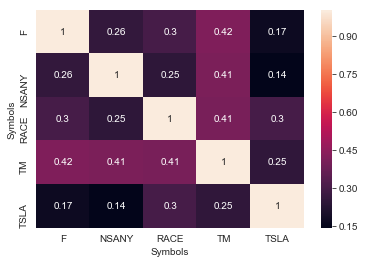

In [110]:

sns.heatmap(data = auto_returns.corr(), annot=True)

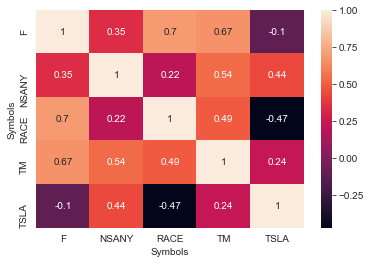

In [111]:
sns.heatmap(data=closing_df.corr(),annot=True)

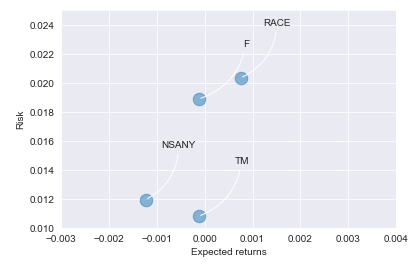

In [115]:
df = auto_returns.dropna()

area = np.pi*50

plt.scatter(df.mean(), df.std(),alpha = 0.5,s =area)


plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])


plt.xlabel('Expected returns')
plt.ylabel('Risk')



for label, x, y in zip(df.columns, df.mean(), df.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [117]:
df.head()

Symbols,F,NSANY,RACE,TM,TSLA
Date,,,,,
2018-05-30,0.009615,-0.005454,0.025429,0.004183,0.028052
2018-05-31,0.000000,-0.010967,0.008445,0.005816,-0.023961
2018-06-01,0.013853,-0.002016,0.011800,0.026100,0.024901
2018-06-04,0.002562,0.014141,-0.004891,0.022618,0.016860
2018-06-05,0.007666,-0.011454,0.032061,-0.006107,-0.018905


In [118]:
df['TSLA'].quantile(.05)

-0.053947026012765735

In [119]:
#This means that with 95% confidence, every day your loses wont increase by 5.4% .


In [166]:
df['RACE'].quantile(0.05)

-0.025071764712672594

In [167]:
df['NSANY'].quantile(.05)

-0.020104480477163334

In [168]:
df['F'].quantile(0.05)

-0.027160360583237675

In [173]:
TSLA.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 20 days,MA for 40 days,MA for 100 days,Daily Return
Date,,,,,,,,,,
2018-05-29,286.500000,276.149994,278.510010,283.760010,5666600,283.760010,NaN,NaN,NaN,NaN
2018-05-30,295.010010,281.600006,283.290009,291.720001,7489700,291.720001,NaN,NaN,NaN,0.028052
2018-05-31,290.369995,282.929993,287.209991,284.730011,5919700,284.730011,NaN,NaN,NaN,-0.023961
2018-06-01,291.950012,283.839996,285.859985,291.820007,5424400,291.820007,NaN,NaN,NaN,0.024901
2018-06-04,299.000000,293.549988,294.339996,296.739990,4797800,296.739990,NaN,NaN,NaN,0.016860


In [169]:

days = 365


dt = 1/days


average = df.mean()['TSLA']


sigma = df.std()['TSLA']

In [170]:
def stock_monte_carlo(start_price,days,averahe,sigma):
    
    
    price = np.zeros(days)
    price[0] = start_price
  
    shock = np.zeros(days)
    drift = np.zeros(days)
    
   
    for x in xrange(1,days):
        
      
        shock[x] = np.random.normal(loc=average * dt, scale=sigma * np.sqrt(dt))
    
        drift[x] = average * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5,1,'Monte Carlo Analysis for Tesla')

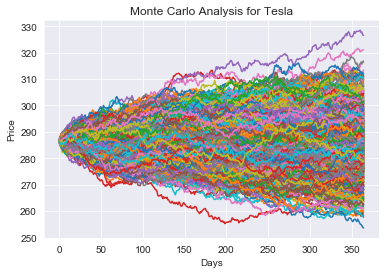

In [176]:
TSLA.head()
start_price = 286.5

for run in xrange(1000):
    plt.plot(stock_monte_carlo(start_price,days,average,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Tesla')

In [178]:

runs = 10000


simulations = np.zeros(runs)


np.set_printoptions(threshold=5)

for run in xrange(runs):    
    
    simulations[run] = stock_monte_carlo(start_price,days,average,sigma)[days-1];

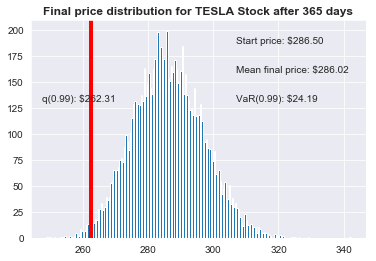

In [179]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for TESLA Stock after %s days" % days, weight='bold');